In [1]:
#SAI KIRAN REDDY K
#CS20B1059
#PRO INDIA DATA-SCIENCE ASSIGNMENT
import pandas as pd
import matplotlib.pyplot as plt

# Load  dataset
books_df = pd.read_csv('books.csv')  # Replace with the correct path to your books.csv file

## Initially data exploration
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [2]:
# Q1: How many rows and columns are there in books.csv dataset?
rows, columns = books_df.shape
print(f"Rows and Columns: {rows}, {columns}")

Rows and Columns: 399, 24


In [3]:
# Q2: How many books do not have an original title?
books_without_original_title = books_df['original_title'].isna().sum()
print(f"Books without Original Title: {books_without_original_title}")

Books without Original Title: 36


In [4]:
# Q3: How many unique books are present in the dataset?
# Evaluate based on the 'book_id' after removing null values in the original_title column.
unique_books = books_df[books_df['original_title'].notna()]['book_id'].nunique()
print(f"Unique Books: {unique_books}")

Unique Books: 363


In [5]:
# Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?
average_rating = books_df['average_rating'].mean()
print(f"Average Rating: {average_rating}")

Average Rating: 3.9837844611528817


In [6]:
# Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
books_in_2000 = books_df[books_df['original_publication_year'] == 2000].shape[0]
print(f"Books Published in 2000: {books_in_2000}")

Books Published in 2000: 8


In [7]:
# Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
book_with_max_ratings = books_df.loc[books_df['work_ratings_count'].idxmax(), 'title']
print(f"Book with Maximum Ratings: {book_with_max_ratings}")

Book with Maximum Ratings: The Diary of a Young Girl


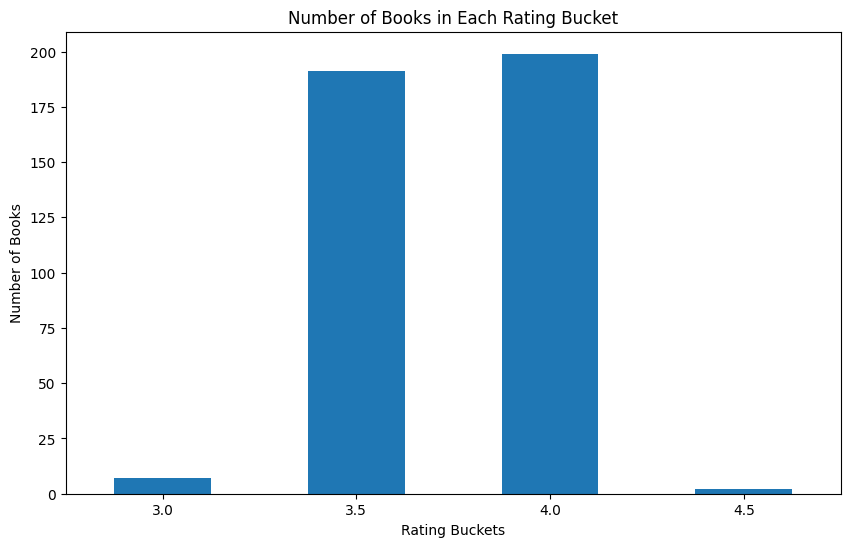

In [8]:
# Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, ... , 5.0].eg: average_rating 3.0 to 3.49 will fall in bucket 3.0
books_df['rating_bucket'] = books_df['average_rating'].apply(lambda x: (x * 2 // 1) / 2)
rating_buckets = books_df.groupby('rating_bucket').size()

# Plot bar graph
plt.figure(figsize=(10, 6))
rating_buckets.plot(kind='bar')
plt.title('Number of Books in Each Rating Bucket')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.show()